In [89]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [7]:
pwd

'/home/jake/Projects/mila/6759/cnn-downscaling'

In [8]:
temp_coarse = xr.open_zarr("./data/processed/temp/5625/temp_5625_processed.zarr").to_dataframe()
temp_fine = xr.open_zarr("./data/processed/temp/1406/temp_1406_processed.zarr").to_dataframe()

In [9]:
temp_coarse.columns=['temperature']
temp_coarse['temperature'] = temp_coarse['temperature'].astype(float)

temp_fine.columns=['temperature']
temp_fine['temperature'] = temp_fine['temperature'].astype(float)

In [10]:
daily_mean_coarse = temp_coarse.groupby("date").mean()

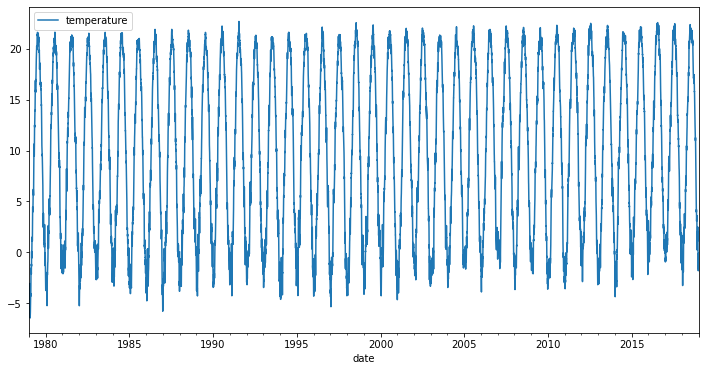

In [11]:
daily_mean_coarse.plot(figsize=(12,6));

In [12]:
temp_coarse_demeaned = temp_coarse - daily_mean_coarse
temp_fine_demeaned = temp_fine - daily_mean_coarse

In [13]:
temp_fine_demeaned

temperature
date       lat       lon                    
1979-01-01 0.703125  -139.21875    36.872961
                     -137.81250    36.948523
                     -136.40625    31.148260
                     -135.00000    29.280371
                     -133.59375    29.375555
...                                      ...
2018-12-31 89.296875 -56.25000    -18.940466
                     -54.84375    -18.932943
                     -53.43750    -18.927053
                     -52.03125    -18.920950
                     -50.62500    -18.914831

[59842560 rows x 1 columns]

In [14]:
random_dates = pd.Series(temp_fine_demeaned.index.levels[0]).sample(2)

In [15]:
list(random_dates)

[Timestamp('2013-02-20 00:00:00'), Timestamp('2009-08-24 00:00:00')]

In [16]:
temp_fine_random = temp_fine.loc[random_dates]
temp_fine_demeaned_random = temp_fine_demeaned.loc[random_dates]

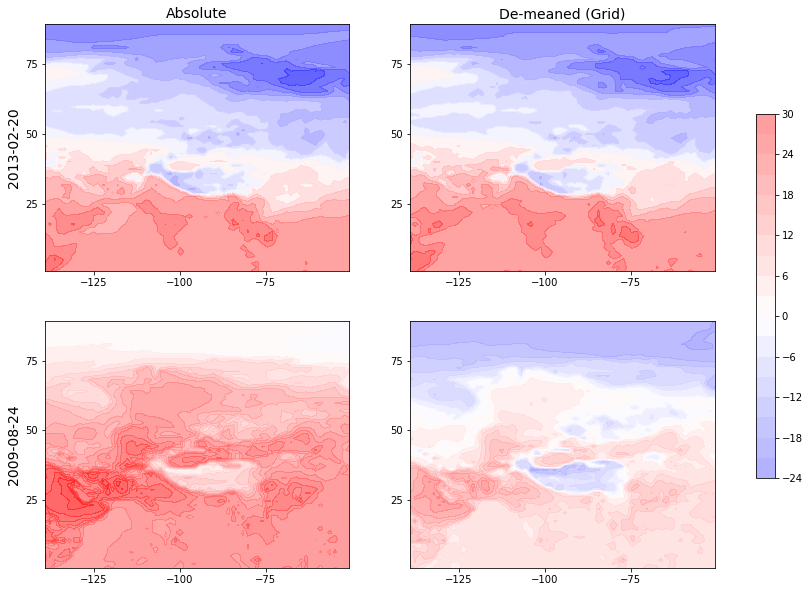

In [151]:
fig, axes = plt.subplots(len(random_dates), 2, figsize=(15, 5*len(random_dates)))

for row, dte in enumerate(random_dates):
    for col, vals in enumerate([temp_fine.loc[dte], temp_fine_demeaned.loc[dte]]):
        vals_grid = vals.unstack("lon")

        cs = axes[row,col].contourf(
            vals_grid.columns.get_level_values("lon"),
            vals_grid.index,
            vals_grid.values,
            levels=16, alpha=.67,
            cmap = 'bwr', vmin=-50, vmax=50
        )

        if row == 0:
            title = "Absolute" if col == 0 else "De-meaned (Grid)"
            axes[row,col].set_title(title, fontsize=14)

        if col == 0:
            axes[row,col].set_ylabel(str(dte.date()), fontsize=14)
            
        axes[row,col].locator_params(nbins=4)

fig.colorbar(cs, ax=axes.ravel().tolist(), shrink=.67);